<h2>Цель проекта: научиться делать резведывательный анализ данных (EDA).</h2>

    
<h3>Основные этапы EDA:
<ol>    
<li> Загрузка данных для анализа и преобразование в удобный для работы формат.</li>
<li> Анализ отдельных показателей (числовых и номинативных). Включая проверку на выбросы, наличие пропущенных значений и составление общих выводов о статистических параметрах. При необходимости отбрасывание “плохих” параметров.</li>
<li> Проведение базового корреляционного анализа (постренение таблицы кореляций). Выявление праметров наиболее влияющих на целевой параметр. Удаление дублирующихся параметров (имеющих крайнесильную взаимную корреляцию).</li>
<li> Проверка статистической значимости параметров против целевого показателя с помощью метода Стьюдента.</li>
<li> Составление выводов по результатам EDA.</li>
</ol> </h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from pandas.api.types import is_string_dtype
import math


def describe_column(c):
    print(c.value_counts())
    c.hist()
    print(c.describe())
    print("ALL_COUNT:" + str(len(c)))


pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

students = pd.read_csv('stud_math.csv')

students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


GP    349
MS     46
Name: school, dtype: int64
count     395
unique      2
top        GP
freq      349
Name: school, dtype: object
ALL_COUNT:395


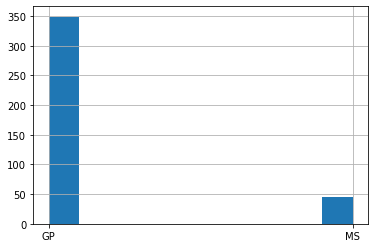

In [2]:
# school
describe_column(students.school)

In [3]:
# Итого, в schools имеем дискретное распределение вероятностей с 2 двумя различными вариантами.
# Ничего особенного по предварительному анализу отдельного столбца school не найдено.
# Учеников из школы GP намного больше учеников школы MS.
# Выбросов не найдено, пустых значений нет.

F    208
M    187
Name: sex, dtype: int64
count     395
unique      2
top         F
freq      208
Name: sex, dtype: object
ALL_COUNT:395


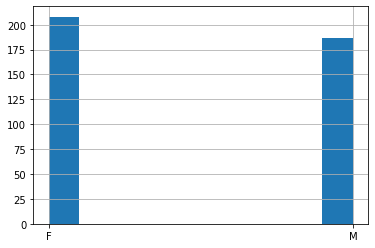

In [4]:
# sex
describe_column(students.sex)

In [5]:
# В sex имеем дискретное распределение вероятностей с 2 двумя различными вариантами.
# Ничего особенного по предварительному анализу отдельного столбца sex не найдено.
# Количество учащихся разных полов отличается не сильно, женского пола больше.
# Выбросов не найдено, пустых значений нет.

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
ALL_COUNT:395


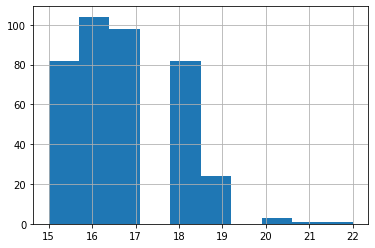

In [6]:
# age
describe_column(students.age)

In [7]:
# Распределение дискретное, выбросов нет (все от 15 до 22 включительно).
# Видно, что количество детей старшего возраста незначительно. Поэтому есть смысл отбросить возрасты 20, 21 и 22.
# Как вариант можно присоединить их к группе 19, но это может нарушить статистические параметры этой группы. Т.к.
# добавится 5 человек к 25, что может являться значительной частью от числа 19-ти летних.
# Отбросим возрасты >= 20.

16    104
17     98
18     82
15     82
19     24
Name: age, dtype: int64
count    390.000000
mean      16.646154
std        1.201081
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       19.000000
Name: age, dtype: float64
ALL_COUNT:390


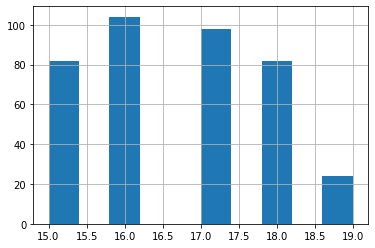

In [8]:
students = students.loc[students.age < 20]
describe_column(students.age)

In [9]:
# Стало лучше, учеников "среднего" (16-17) больше всех.

U    292
R     82
Name: address, dtype: int64
count     374
unique      2
top         U
freq      292
Name: address, dtype: object
ALL_COUNT:390


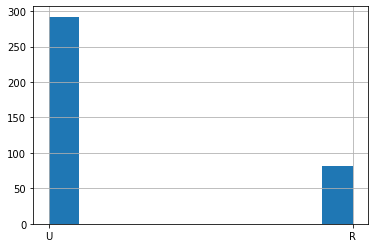

In [10]:
# address
describe_column(students.address)

In [11]:
# Итого, в address имеем дискретное распределение вероятностей с 2 двумя различными вариантами.
# Ничего особенного по предварительному анализу отдельного столбца address не найдено.
# Учеников из города намного больше учеников школы из "вне города".
# Выбросов не найдено, пустые значения есть (390 - 374 = 16) < 5%.

GT3    257
LE3    106
Name: famsize, dtype: int64
count     363
unique      2
top       GT3
freq      257
Name: famsize, dtype: object
ALL_COUNT:390


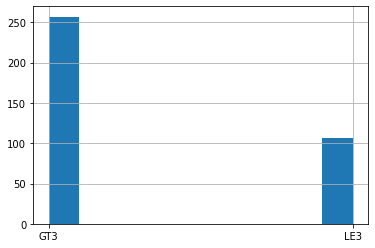

In [12]:
# famsize
describe_column(students.famsize)

In [13]:
# Итого, в famsize имеем дискретное распределение вероятностей с 2 двумя различными вариантами.
# Ничего особенного по предварительному анализу отдельного столбца famsize не найдено.
# Учеников из семей с числом людей > 3 больше учеников с семьёй размера <=3.
# Выбросов не найдено, пустые значения есть (390 - 363 = 27) < 10%.

T    311
A     34
Name: Pstatus, dtype: int64
count     345
unique      2
top         T
freq      311
Name: Pstatus, dtype: object
ALL_COUNT:390


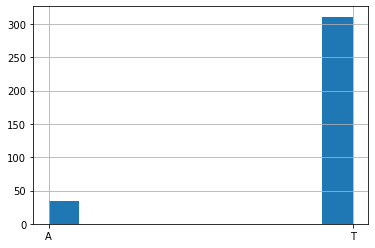

In [14]:
# Pstatus
describe_column(students.Pstatus)

In [15]:
# Итого, в Pstatus имеем дискретное распределение вероятностей с 2 двумя различными вариантами.
# Ничего особенного по предварительному анализу отдельного столбца famsize не найдено.
# Учеников из семей с совместно живущими родителями больше, чем с раздельно живущими.
# Выбросов не найдено, пустые значения есть (390 - 345 = 45) = 11.5%.

4.0    130
2.0    101
3.0     95
1.0     58
0.0      3
Name: Medu, dtype: int64
count    387.000000
mean       2.751938
std        1.098970
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64
ALL_COUNT:390


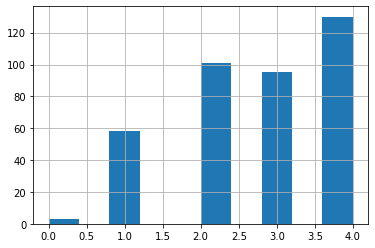

In [16]:
# Medu
describe_column(students.Medu)

In [17]:
# Распределение дискретное, выбросов нет (все от 0 до 4 включительно). 3 пустых значения.
# Видно, что количество количество матерей без образования очень мало.
# С увеличением качества образования есть тенденция к увеличению размера категории.

2.0     103
3.0      96
4.0      88
1.0      76
0.0       2
40.0      1
Name: Fedu, dtype: int64
count    366.000000
mean       2.628415
std        2.240025
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64
ALL_COUNT:390


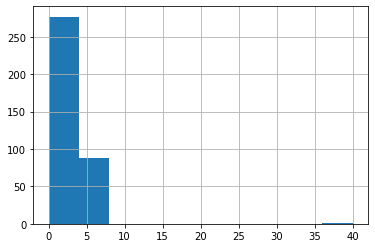

In [18]:
# Fedu
describe_column(students.Fedu)

2.0    103
3.0     96
4.0     88
1.0     76
0.0      2
Name: Fedu, dtype: int64
count    365.000000
mean       2.526027
std        1.088151
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64
ALL_COUNT:389


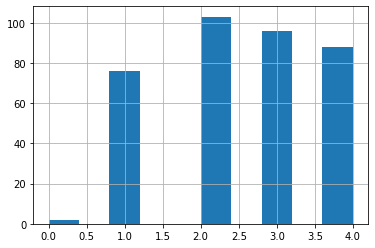

In [19]:
# есть выбросы. уберём их (согласно условию модели 0<=x<=4)
students = students.loc[students.Fedu != 40]
describe_column(students.Fedu)

In [20]:
# Распределение дискретное. 389-365 = 26 пустых значений < 10%.
# Видно, что количество количество отцов без образования очень мало.
# Размеры остальных категорий более-менее совпадают.

other       132
services     94
at_home      58
teacher      55
health       31
Name: Mjob, dtype: int64
count       370
unique        5
top       other
freq        132
Name: Mjob, dtype: object
ALL_COUNT:389


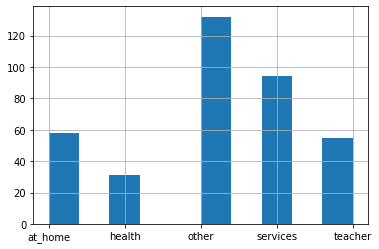

In [21]:
# Mjob
describe_column(students.Mjob)

In [22]:
# Распределение дискретное. 389-346 = 43 пустых значения, что составляет около 11%.
# Закономерностей не найдено. Выбросов нет.

other       193
services    100
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64
count       353
unique        5
top       other
freq        193
Name: Fjob, dtype: object
ALL_COUNT:389


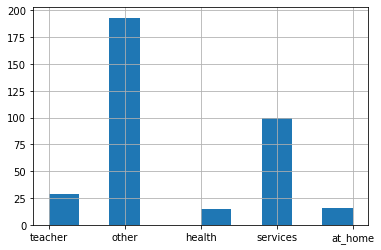

In [23]:
# Fjob
describe_column(students.Fjob)

In [24]:
# Распределение дискретное.
# 389-331 = 58 пустых значений, что составляет около 15%.
# Две категории из 5 являются преобладающим. Выбросов нет.

course        133
home          104
reputation    102
other          33
Name: reason, dtype: int64
count        372
unique         4
top       course
freq         133
Name: reason, dtype: object
ALL_COUNT:389


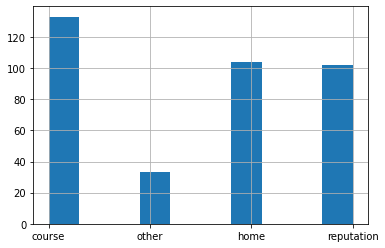

In [25]:
# reason
describe_column(students.reason)

In [26]:
# Распределение дискретное.
# 389-349 = 40 пустых значений, что составляет около 10,5%.
# Одна из категорий (other) существенно меньше других. Выбросов нет.

mother    249
father     85
other      27
Name: guardian, dtype: int64
count        361
unique         3
top       mother
freq         249
Name: guardian, dtype: object
ALL_COUNT:389


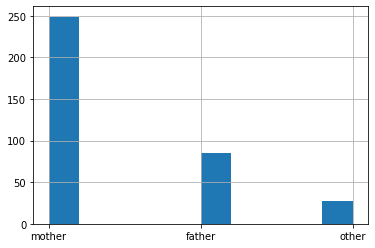

In [27]:
# guardian
describe_column(students.guardian)

In [28]:
# Распределение дискретное.
# 389-338 = 51 пустое значение, что составляет около 13,3%.
# Матери являются опекунами чаще всего. Выбросов нет.

1.0    238
2.0     95
3.0     21
4.0      7
Name: traveltime, dtype: int64
count    361.000000
mean       1.437673
std        0.692916
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64
ALL_COUNT:389


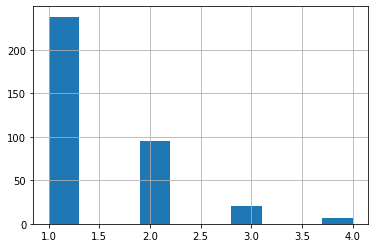

In [29]:
# traveltime
describe_column(students.traveltime)

In [30]:
# Распределение дискретное. Выбросов нет (всё от 1 до 4 включительно)
# 389-340 = 49 пустых значений, что составляет около 13%.
# Столбец показывает, что дети обычно живут близко к школе.

2.0    193
1.0    100
3.0     62
4.0     27
Name: studytime, dtype: int64
count    382.000000
mean       2.041885
std        0.840775
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64
ALL_COUNT:389


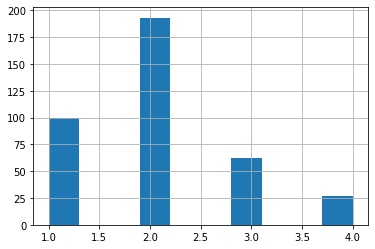

In [31]:
# studytime
describe_column(students.studytime)

In [32]:
# Распределение дискретное. Выбросов нет (всё от 1 до 4 включительно)
# 389-358 = 31 пустое значение, что составляет около 8%.
# Распределение в столбце похоже на нормальное с наибольшей частотой 2-5 часов.

0.0    291
1.0     49
2.0     14
3.0     13
Name: failures, dtype: int64
count    367.000000
mean       0.316076
std        0.711604
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64
ALL_COUNT:389


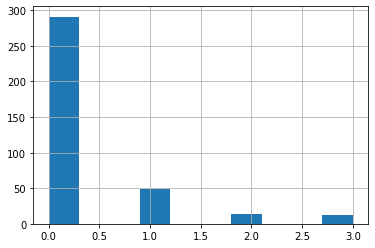

In [33]:
# failures
describe_column(students.failures)

In [34]:
# Распределение дискретное. Выбросов нет (всё от 0 до 3 включительно)
# 389-346 = 43 пустых значения, что составляет около 11%.
# Преобладает значение 0, с частотой 80%.

no     330
yes     51
Name: schoolsup, dtype: int64
count     381
unique      2
top        no
freq      330
Name: schoolsup, dtype: object
ALL_COUNT:389


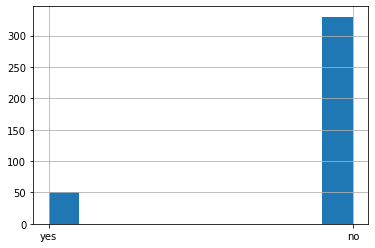

In [35]:
# schoolsup
describe_column(students.schoolsup)

In [36]:
# Распределение дискретное с двумя состояниями. Выбросов нет
# 389-357 = 32 пустых значения, что составляет около 8,5%.
# 87% учеников не получают дополнительную образовательную поддержку.

yes    216
no     134
Name: famsup, dtype: int64
count     350
unique      2
top       yes
freq      216
Name: famsup, dtype: object
ALL_COUNT:389


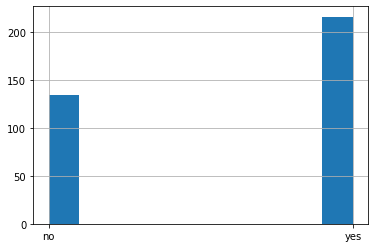

In [37]:
# famsup
describe_column(students.famsup)

In [38]:
# Распределение дискретное с двумя состояниями. Выбросов нет
# 389-330 = 59 пустых значений, что составляет около 15%.
# Соотношение частот составляет 39/61 %.

no     196
yes    153
Name: paid, dtype: int64
count     349
unique      2
top        no
freq      196
Name: paid, dtype: object
ALL_COUNT:389


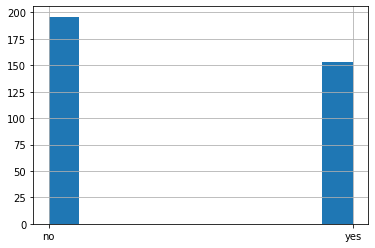

In [39]:
# paid
describe_column(students.paid)

In [40]:
# Распределение дискретное с двумя состояниями. Выбросов нет
# 389-328 = 61 пустых значения, что составляет около 16%.
# Соотношение частот составляет 56/44 %.

yes    193
no     182
Name: activities, dtype: int64
count     375
unique      2
top       yes
freq      193
Name: activities, dtype: object
ALL_COUNT:389


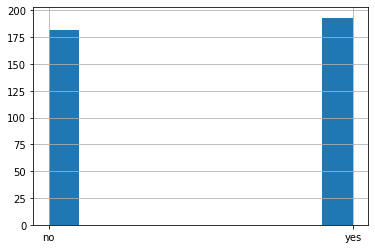

In [41]:
# activities
describe_column(students.activities)

In [42]:
# Распределение дискретное с двумя состояниями. Выбросов нет
# 389-351 = 38 пустых значений, что составляет около 10%.
# Соотношение частот категорий почти равномерное.

yes    297
no      76
Name: nursery, dtype: int64
count     373
unique      2
top       yes
freq      297
Name: nursery, dtype: object
ALL_COUNT:389


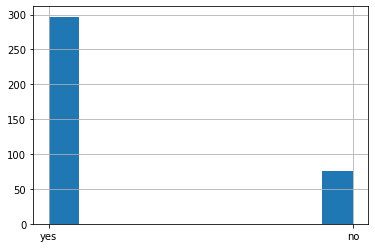

In [43]:
# nursery
describe_column(students.nursery)

In [44]:
# Распределение дискретное с двумя состояниями. Выбросов нет
# 389-349 = 40 пустых значений, что составляет около 10,5%.
# Большая часть учеников посещала детский сад.

yes    352
no      18
Name: higher, dtype: int64
count     370
unique      2
top       yes
freq      352
Name: higher, dtype: object
ALL_COUNT:389


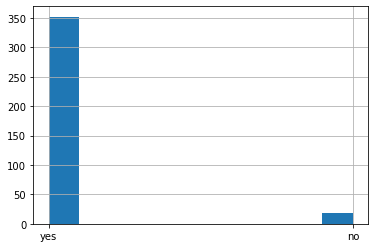

In [45]:
# higher
describe_column(students.higher)

In [46]:
# Распределение дискретное с двумя состояниями. Выбросов нет
# 389-348 = 41 пустое значение, что составляет около 10,5%.
# Большая часть учеников хочет получить высшее образование (95%)
# Столбец является кандидатом на удаление.

yes    302
no      53
Name: internet, dtype: int64
count     355
unique      2
top       yes
freq      302
Name: internet, dtype: object
ALL_COUNT:389


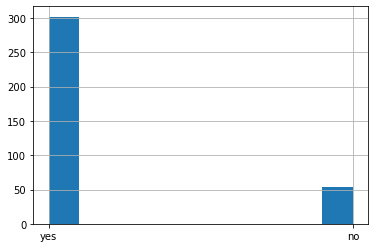

In [47]:
# internet
describe_column(students.internet)

In [48]:
# Распределение дискретное с двумя состояниями. Выбросов нет
# 389-332 = 57 пустых значений, что составляет около 15%.
# Большая часть учеников имеет дома Интернет (85%)

no     236
yes    122
Name: romantic, dtype: int64
count     358
unique      2
top        no
freq      236
Name: romantic, dtype: object
ALL_COUNT:389


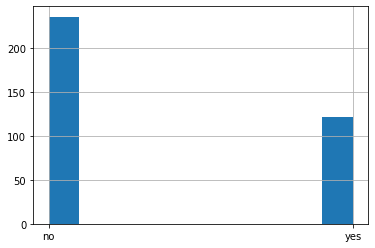

In [49]:
# romantic
describe_column(students.romantic)

In [50]:
# Распределение дискретное с двумя состояниями. Выбросов нет
# 389-337 = 52 пустых значения, что составляет около 13,5%.
# Соотношения частот 66/34%.

 4.0    182
 5.0     93
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64
count    362.000000
mean       3.919890
std        0.924695
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64
ALL_COUNT:389


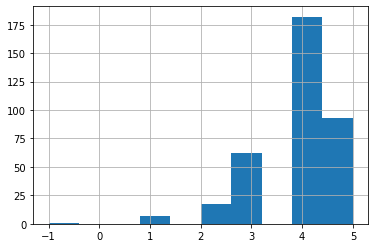

In [51]:
# famrel
describe_column(students.famrel)

4.0    182
5.0     93
3.0     62
2.0     17
1.0      7
Name: famrel, dtype: int64
count    361.000000
mean       3.933518
std        0.888826
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64
ALL_COUNT:388


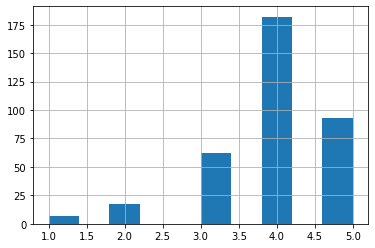

In [52]:
# есть выброс (-1), уберём его
students = students.loc[students.famrel != -1]
describe_column(students.famrel)

In [53]:
# Распределение дискретное.
# 388-340 = 48 пустых значений, что составляет около 12%.
# Распределение похоже на нормальное с наибольшей частотой 4. Отношения в семье больше хорошие.

3.0    153
4.0    110
2.0     61
5.0     35
1.0     18
Name: freetime, dtype: int64
count    377.000000
mean       3.220159
std        0.984895
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64
ALL_COUNT:388


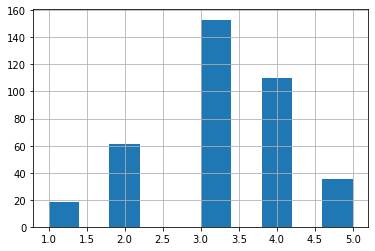

In [54]:
# freetime
describe_column(students.freetime)

In [55]:
# Распределение дискретное. выбросов нет.
# 388-331 = 57 пустых значений, что составляет около 15%.
# Распределение похоже на нормальное с наибольшей частотой 3.

3.0    124
2.0     99
4.0     83
5.0     51
1.0     23
Name: goout, dtype: int64
count    380.000000
mean       3.105263
std        1.118081
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64
ALL_COUNT:388


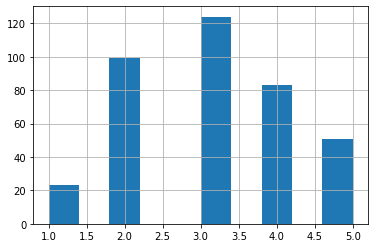

In [56]:
# goout
describe_column(students.goout)

In [57]:
# Распределение дискретное. выбросов нет.
# 388-332 = 56 пустых значений, что составляет около 15%.
# Распределение похоже на нормальное с наибольшей частотой 3.
# Похоже, что столбец коррелирует с предыдущим столбцом.

5.0    136
3.0     87
4.0     61
1.0     46
2.0     43
Name: health, dtype: int64
count    373.000000
mean       3.530831
std        1.397863
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64
ALL_COUNT:388


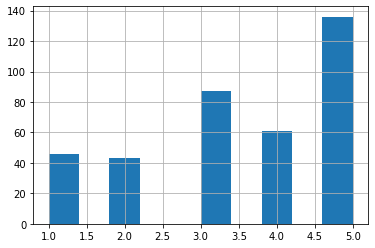

In [58]:
# health
describe_column(students.health)

In [59]:
# Распределение дискретное. выбросов нет.
# 388-327 = 61 пустое значение, что составляет около 16%.
# несущественных категорий нет.

0.0      110
2.0       60
4.0       51
6.0       31
8.0       21
10.0      17
12.0      12
14.0      11
3.0        7
16.0       6
7.0        6
18.0       5
5.0        5
20.0       4
22.0       3
1.0        3
9.0        3
11.0       2
13.0       2
15.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
17.0       1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
28.0       1
Name: absences, dtype: int64
count    376.000000
mean       6.742021
std       21.172433
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64
ALL_COUNT:388


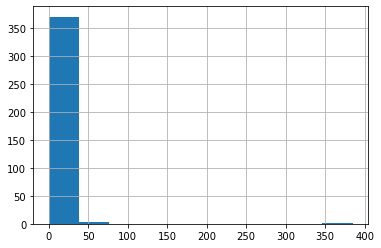

In [60]:
# absences
describe_column(students.absences)

0.0     110
2.0      60
4.0      51
6.0      31
8.0      21
10.0     17
12.0     12
14.0     11
3.0       7
16.0      6
7.0       6
18.0      5
5.0       5
20.0      4
1.0       3
9.0       3
11.0      2
13.0      2
15.0      2
19.0      1
17.0      1
Name: absences, dtype: int64
count    360.000000
mean       4.566667
std        4.938733
min        0.000000
25%        0.000000
50%        3.500000
75%        7.000000
max       20.000000
Name: absences, dtype: float64
ALL_COUNT:372


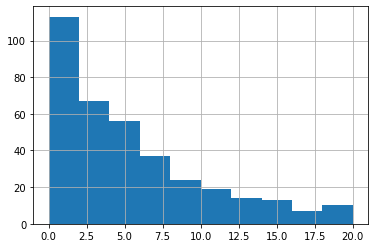

In [61]:
# есть выброс (385) , нужно ограничить сверху q75 + 1.5 * IQT( < 8 + 1.5 * 8 = 20)
#print((students.absences > 20).sum())
students.absences = students.absences.apply(
    lambda x: 100500 if (not math.isnan(x) and (x > 20)) else x)
students = students.loc[students.absences != 100500]
describe_column(students.absences)

In [62]:
# Распределение дискретное.
# 372-360 = 12 пустых значений, что составляет около 3%.
# Частота отутствий убывает с увеличением их количества.

50.0     54
55.0     42
0.0      37
75.0     32
65.0     30
60.0     30
70.0     27
40.0     26
45.0     23
80.0     16
30.0     14
90.0      9
35.0      8
25.0      7
95.0      5
85.0      5
100.0     1
Name: score, dtype: int64
count    366.000000
mean      52.158470
std       23.107539
min        0.000000
25%       41.250000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64
ALL_COUNT:372


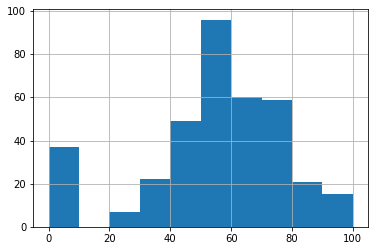

In [63]:
# score
describe_column(students.score)

In [64]:
# Выбросов нет, но очень странное занчение 0 (может ео отбросить?).
# Без 0 похоже на нормальное с максимальной частотой 55.
# 372-366 = 6 пустых значений, что составляет около 1.5%.

-6.0     183
-3.0      95
-9.0      60
-12.0     27
Name: studytime, granular, dtype: int64
count    365.000000
mean      -6.156164
std        2.545249
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64
ALL_COUNT:372


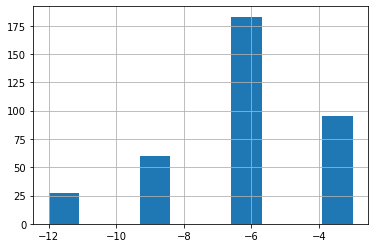

In [65]:
#'studytime, granular'
describe_column(students['studytime, granular'])

In [66]:
# Дискретное распределение (похоже на распределение со значениями 1,2,3,4 умноженными на -3)
# Выбросов нет
# 372-365 = 7 пустых значений, что составляет около 1.5%.

In [67]:
# корреляционный анализ
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.193682,-0.153219,0.113144,0.019155,0.140616,-0.019155,0.020253,0.003230,0.138418,-0.044261,0.149176,-0.181578
Medu,-0.193682,1.000000,0.633148,-0.189928,0.091920,-0.262809,-0.091920,-0.018610,0.044148,0.050585,-0.039361,0.068467,0.216093
Fedu,-0.153219,0.633148,1.000000,-0.164808,0.005907,-0.272254,-0.005907,-0.017897,0.001306,0.048565,0.019017,-0.012545,0.127299
traveltime,0.113144,-0.189928,-0.164808,1.000000,-0.110733,0.093038,0.110733,-0.030534,0.000200,0.038197,-0.022651,-0.042485,-0.074656
studytime,0.019155,0.091920,0.005907,-0.110733,1.000000,-0.170114,-1.000000,0.031750,-0.124409,-0.034984,-0.088388,-0.069020,0.118255
failures,0.140616,-0.262809,-0.272254,0.093038,-0.170114,1.000000,0.170114,-0.022883,0.069383,0.101169,0.121257,0.052202,-0.358621
"studytime, granular",-0.019155,-0.091920,-0.005907,0.110733,-1.000000,0.170114,1.000000,-0.031750,0.124409,0.034984,0.088388,0.069020,-0.118255
famrel,0.020253,-0.018610,-0.017897,-0.030534,0.031750,-0.022883,-0.031750,1.000000,0.152144,0.064877,0.095951,-0.078070,0.058454
freetime,0.003230,0.044148,0.001306,0.000200,-0.124409,0.069383,0.124409,0.152144,1.000000,0.278614,0.060114,0.104422,0.035836
goout,0.138418,0.050585,0.048565,0.038197,-0.034984,0.101169,0.034984,0.064877,0.278614,1.000000,0.007246,0.107291,-0.111050


In [68]:
# Видна связь между уровнем образования родителей (Fedu и Medu)
# столбец 'studytime, granular' по отношению к столбцу studytime является производным и инвертированным (будет исключён)
# видны прямые корреляции score/Medu, score/Fedu, Fedu/Medu, age/failures, age/absences, age/goout, age/traveltime
#  studytime/score, failures/health, famrel/freetime, freetime/goout
# видны обратные корреляции age/Fedu, age/Medu, age/score, Medu/traveltime, Fedu/traveltime, Medu/failures,
# Fedu/failures, studytime/failures, studytime/freetime, failures/score, goout/score
# большинство столбцов здесь являются фиктивно числовыми (Medu, Fedu, traveltime, studytime, failures, famrel,
# goout, health), их пересмотрим ниже ещё раз.
# Настоящие числовые - age, absences, score
# Из числовых столбцов absences не сильно коррелирует со score

In [69]:
students.drop(['studytime, granular'], inplace=True, axis=1)

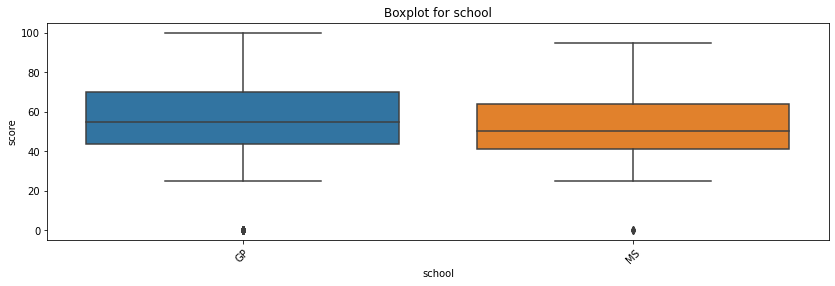

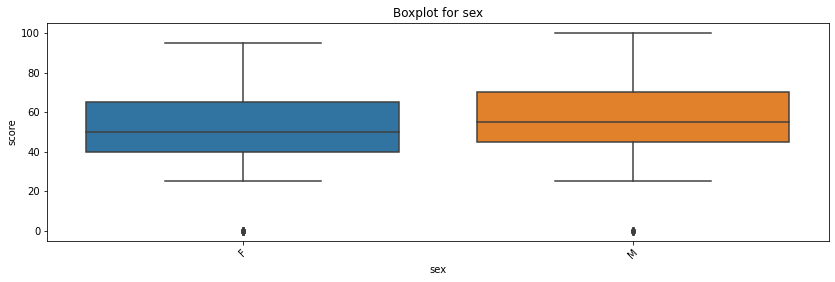

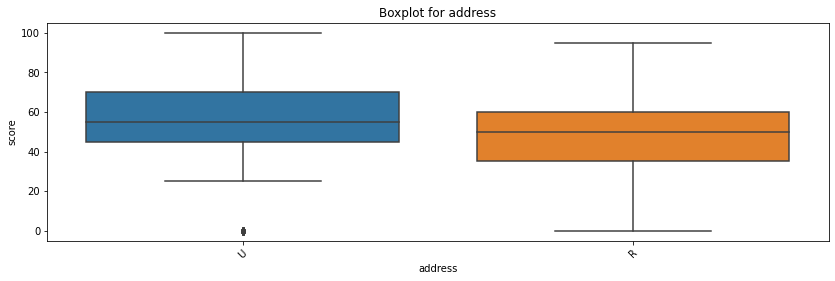

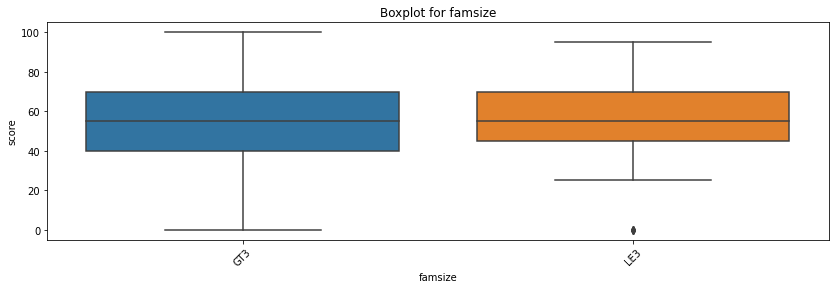

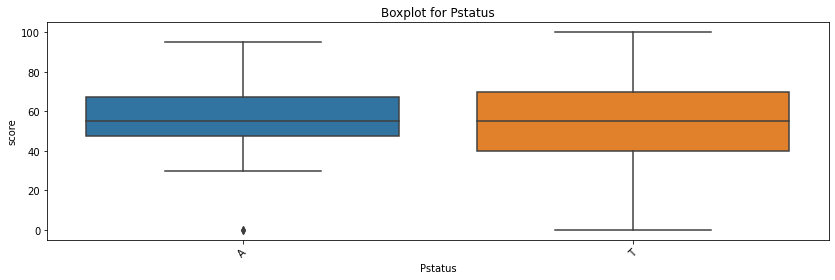

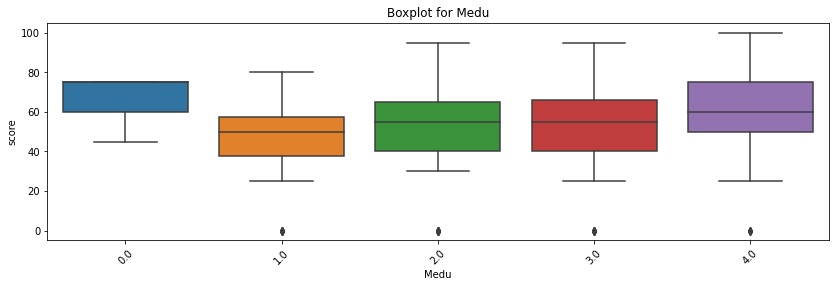

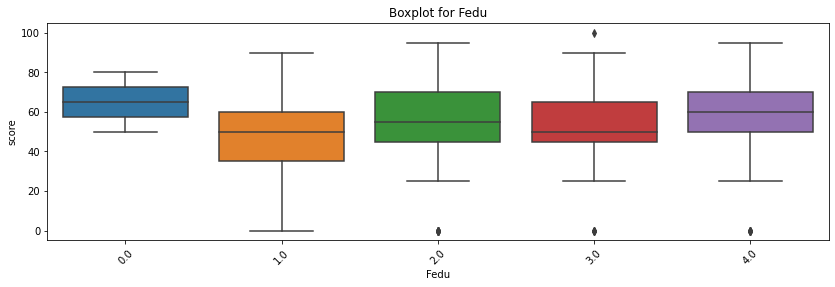

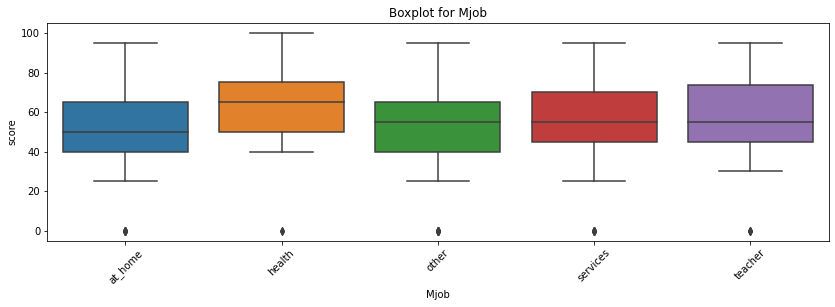

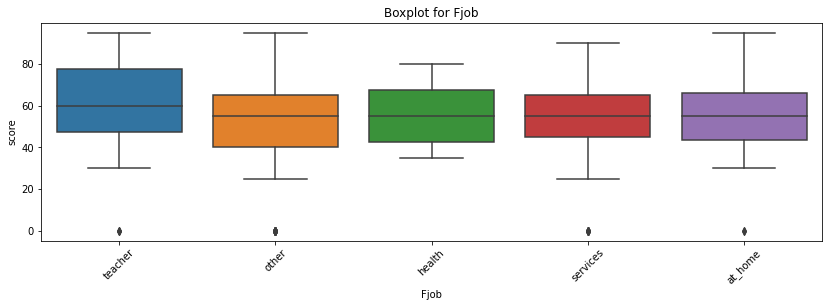

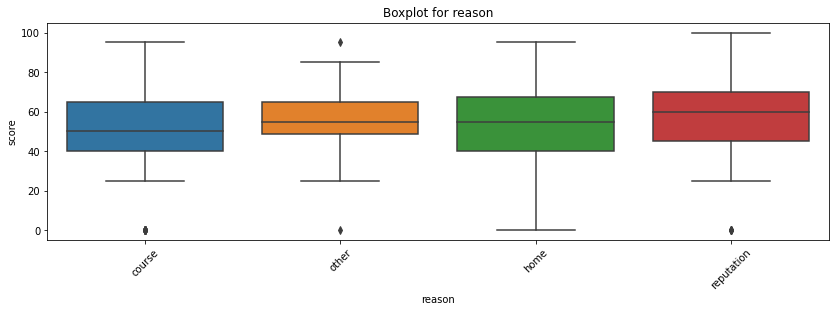

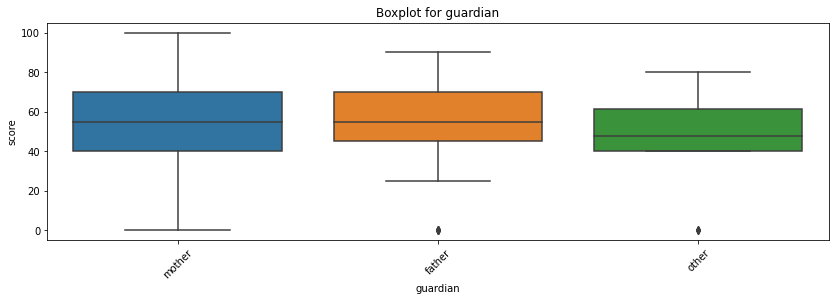

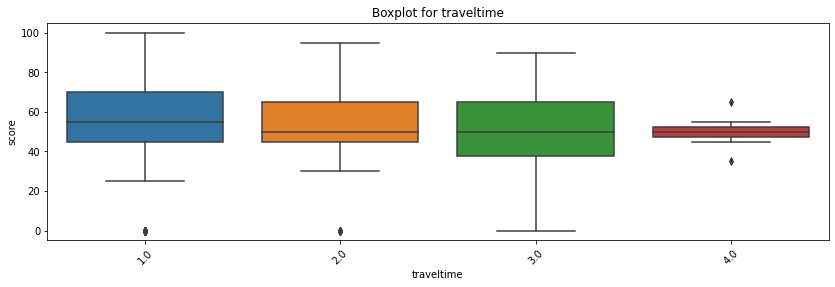

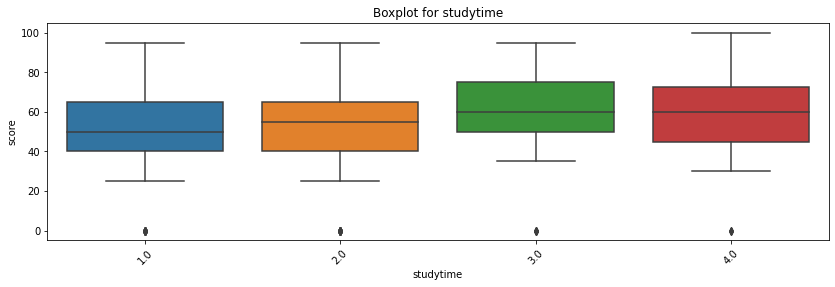

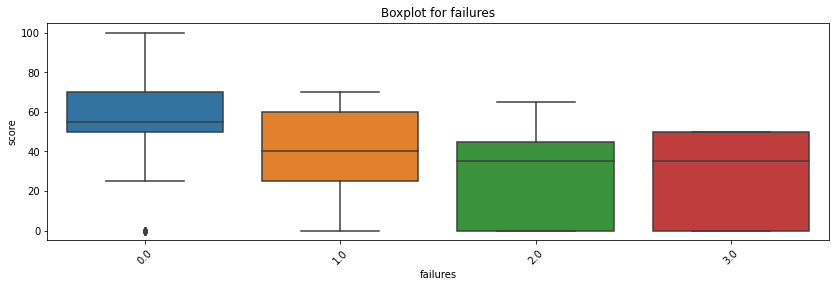

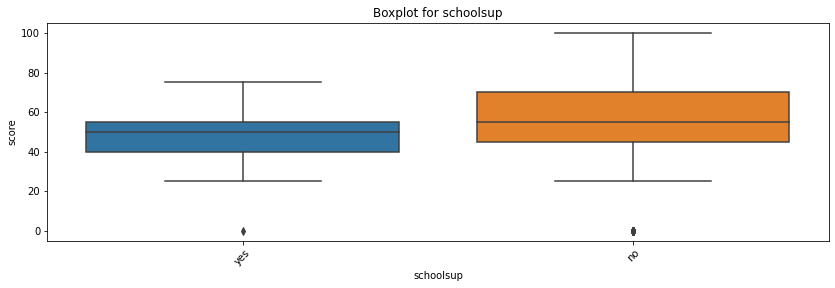

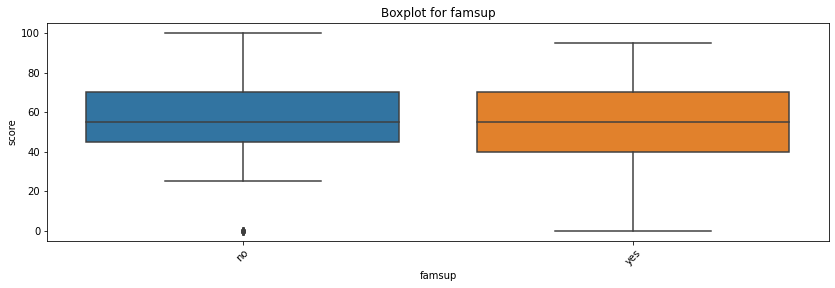

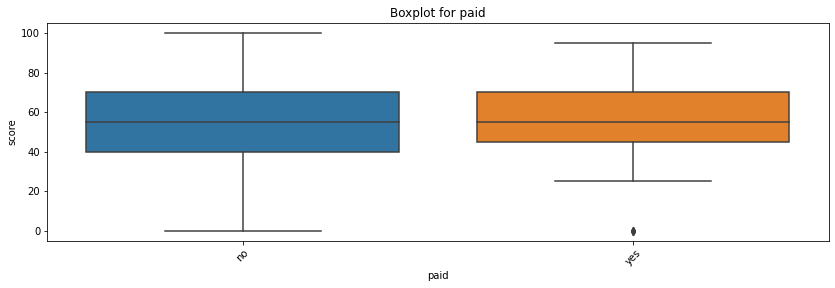

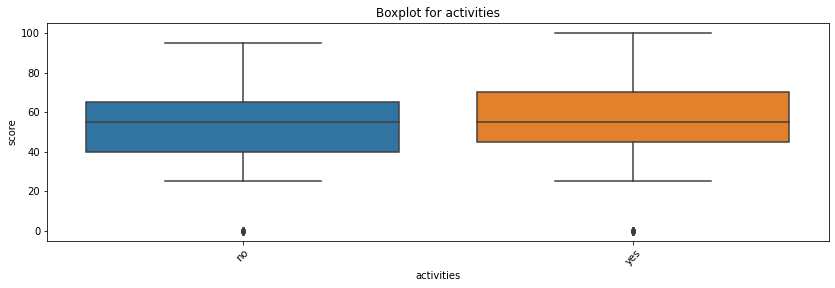

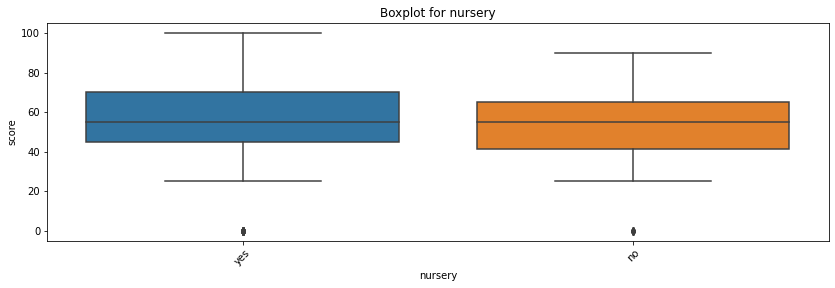

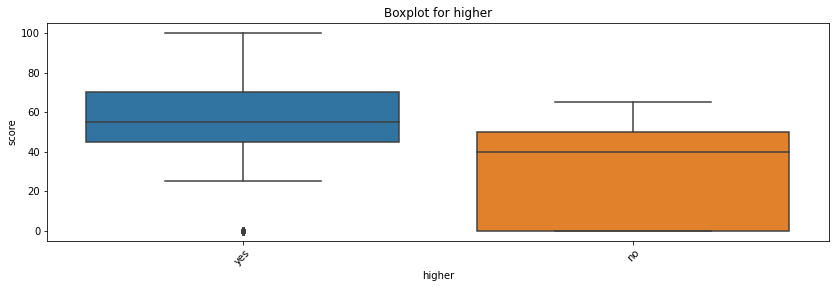

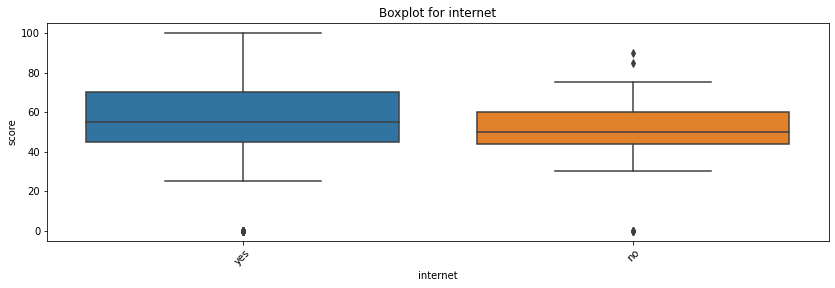

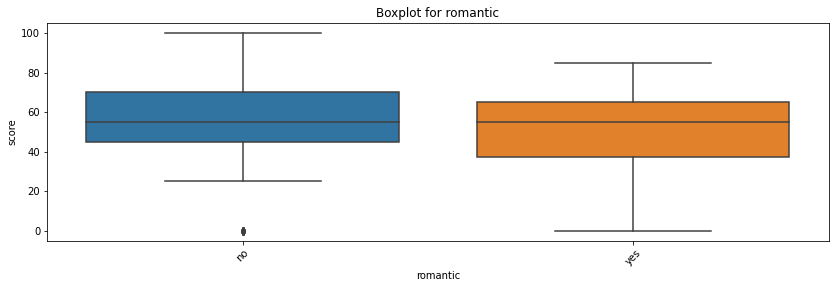

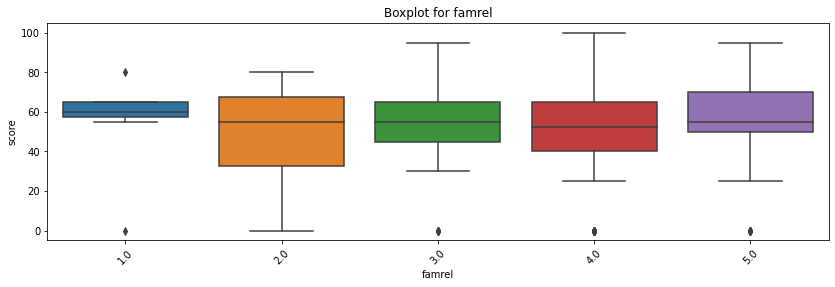

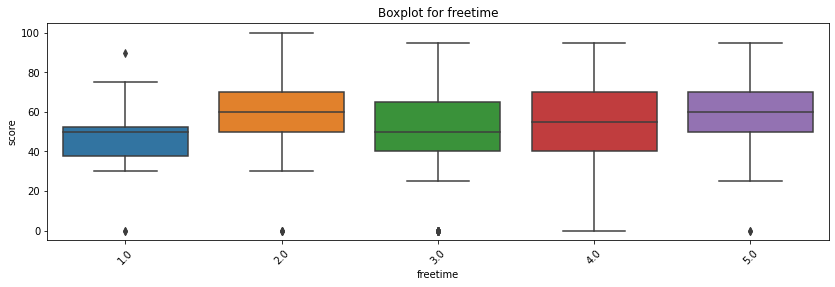

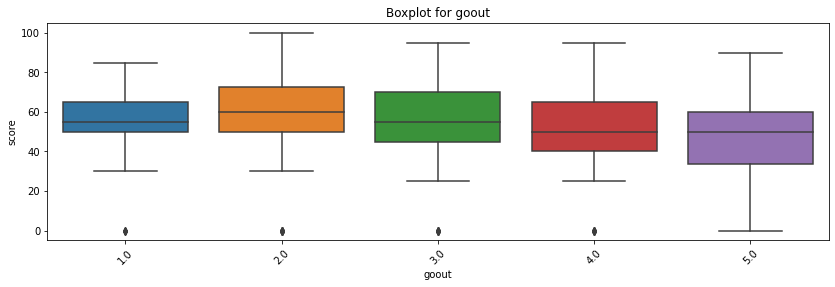

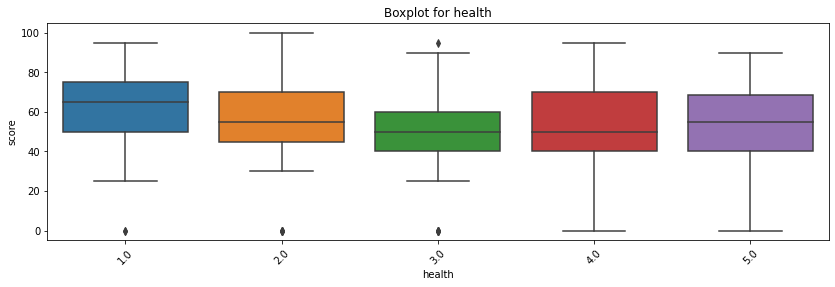

In [70]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(
                    students.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


for c in students.columns:
    if not c in ['score', 'age', 'absences']:
        get_boxplot(c)

In [71]:
# По визуальному анализу графиков сложно сказать, какие столбцы можно отбросить

In [72]:
def get_stat_diff(column):
    cols = students.loc[:, column].value_counts().index[:0]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


for c in students.columns:
    if not c in ['score', 'age', 'absences']:
        get_stat_diff(c)

In [73]:
# тест Стьюдента не нашел статистически значимых различий для всех колонок
# есть вопрос о применимости теста Стьюдента, т.к. он применяется для выборок с нормальным распределенией,
# что в данном случае не соответствует действительности.

<h2>Выводы<h2>
<h3>В результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, были получены следующие выводы:
<ol>
    <li>В данных достаточно мало пустых значений, максимальное количество пропусков в столбцах с информацией о дополнительных платных занятих по математике и о текущем состоянии здоровья (около 16%).</li>
   <li> Выбросы найдены только в столбцах с информацией об образовании отца, отношениях в семье и пропусках занятий, что позволяет сделать вывод о том, что данные достаточно чистые.</li>    
    <li>Замечено, что учащиеся, живущие в городе, в среднем учатся лучше, чем учащиеся из сельской местности. А так же, что учащиеся, планирующие получать высшее образование, имеют более высокие баллы по математике. </li>
    <li>Сложно выделить несколько самых важных параметров, для построения модели в дальнейшем. Я бы предложила обратить внимание на столбцы age, studytime, Medu, higher, address, failures и goout.</li>
    </ol><h3>
